In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display, HTML
import string
from calendar import monthrange
%matplotlib notebook

1. Web scraping

    ○ Korzystając z metody pd.read_html(‘http.someurl.com’) pobierz listę dostępnych
    podstron ze strony http://cdv.brightcode.pl/wolneodpracy
    
    ○ Następnie iterując po pobranych linkach pobierz zawartość tabel z podstron. Dane zgromadź w
    4 obiektach DataFrame odpowiadających dniom wolnym w 2018, 2019 oraz długim
    weekendom 2018, 2019. Zastosuj się do reguł zawartych w robots.txt.


In [78]:
subpages = pd.read_html('http://cdv.brightcode.pl/wolneodpracy')
subpages

[    rok                                             URL  link
 0  2018  http://cdv.brightcode.pl/wolneodpracy/2018.php  2018
 1  2019  http://cdv.brightcode.pl/wolneodpracy/2019.php  2019]

In [79]:
free2018 = pd.read_html(subpages[0].URL[0])
free2019 = pd.read_html(subpages[0].URL[1])
wknd2018 = free2018[1]
wknd2019 = free2019[1]


In [80]:
display(wknd2018)
display(wknd2019)

,Ile dni?,Data,Które święta zawiera
0,3,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki"
1,3,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny"
2,4,28 kwietnia - 1 maja,Święto Pracy
3,4,3 - 6 maja,Święto Konstytucji 3 Maja
4,4,31 maja - 3 czerwca,Boże Ciało
5,4,1 - 4 listopada,Wszystkich Świętych
6,5,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt"


,Ile dni?,Data,Które święta zawiera
0,4,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki"
1,3,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny"
2,5,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja"
3,4,20 - 23 czerwca,Boże Ciało
4,4,15 - 18 sierpnia,"Święto Wojska Polskiego, Wniebowzięcie Najświę..."
5,3,1 - 3 listopada,Wszystkich Świętych
6,3,9 - 11 listopada,Święto Niepodległości
7,5,25 - 29 grudnia,"Boże Narodzenie (pierwszy dzień), Boże Narodze..."


In [81]:
free2018 = free2018[0]
free2019 = free2019[0]

In [82]:
display(free2018)
display(free2019)

,Data,Dzień,Święta
0,1 styczeń,poniedziałek,Nowy Rok
1,6 styczeń,sobota,Święto Trzech Króli
2,1 kwiecień,niedziela,Wielkanoc
3,2 kwiecień,poniedziałek,Poniedziałek Wielkanocny
4,1 maj,wtorek,Święto Pracy
5,3 maj,czwartek,Święto Konstytucji 3 Maja
6,20 maj,niedziela,Zielone Świątki
7,31 maj,czwartek,Boże Ciało
8,15 sierpień,środa,Wniebowzięcie Najświętszej Maryi Panny
9,1 listopad,czwartek,Wszystkich Świętych


,Data,Dzień,Święta
0,1 styczeń,wtorek,Nowy Rok
1,6 styczeń,niedziela,Święto Trzech Króli
2,21 kwiecień,niedziela,Wielkanoc
3,22 kwiecień,poniedziałek,Poniedziałek Wielkanocny
4,1 maj,środa,Święto Pracy
5,3 maj,piątek,Święto Konstytucji 3 Maja
6,9 czerwiec,niedziela,Zielone Świątki
7,20 czerwiec,czwartek,Boże Ciało
8,15 sierpień,czwartek,Wniebowzięcie Najświętszej Maryi Panny
9,1 listopad,piątek,Wszystkich Świętych


2. Eksport do csv

    ○ Utwórz 2 nowe obiekty DataFrame w których zgromadzisz odpowiednio dane dotyczące dni
    wolnych oraz dane dotyczące długich weekendów. W każdej ramce danych uwzględnij
    dodatkowo kolumnę year i uzupełnij odpowiednia wartością.
    
    ○ Zapisz obiekty DataFrame w plikach .csv.


In [83]:
free2018 = free2018.rename(columns = {'Święta': 'holidays', 'Data': 'date', 'Dzień': 'which_day'})
wknd2018 = wknd2018.rename(columns = {'Ile dni?': 'how_many_days', 'Data': 'date', 'Które święta zawiera': 'holidays'})

free2019 = free2019.rename(columns = {'Święta': 'holidays', 'Data': 'date', 'Dzień': 'which_day'})
wknd2019 = wknd2019.rename(columns = {'Ile dni?': 'how_many_days', 'Data': 'date', 'Które święta zawiera': 'holidays'})

free2019['year'] = 2019
wknd2019['year'] = 2019

free2018['year'] = 2018
wknd2018['year'] = 2018

free = free2018.append(free2019)
wknd = wknd2018.append(wknd2019)


display(free)
display(wknd)


,date,which_day,holidays,year
0,1 styczeń,poniedziałek,Nowy Rok,2018
1,6 styczeń,sobota,Święto Trzech Króli,2018
2,1 kwiecień,niedziela,Wielkanoc,2018
3,2 kwiecień,poniedziałek,Poniedziałek Wielkanocny,2018
4,1 maj,wtorek,Święto Pracy,2018
5,3 maj,czwartek,Święto Konstytucji 3 Maja,2018
6,20 maj,niedziela,Zielone Świątki,2018
7,31 maj,czwartek,Boże Ciało,2018
8,15 sierpień,środa,Wniebowzięcie Najświętszej Maryi Panny,2018
9,1 listopad,czwartek,Wszystkich Świętych,2018


,how_many_days,date,holidays,year
0,3,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2018
1,3,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2018
2,4,28 kwietnia - 1 maja,Święto Pracy,2018
3,4,3 - 6 maja,Święto Konstytucji 3 Maja,2018
4,4,31 maja - 3 czerwca,Boże Ciało,2018
5,4,1 - 4 listopada,Wszystkich Świętych,2018
6,5,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt",2018
0,4,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2019
1,3,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2019
2,5,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja",2019


In [84]:
wknd.to_csv('wknd.csv')
free.to_csv('free.csv')

3. Import i przetwarzanie

    ○ Zaimportuj dane zapisane w poprzednim zadaniu.
    
    ○ W ramce danych z dniami wolnymi dodaj kolumny: day oraz month
        
    ○ Wypełnij dane w nowo dodanych kolumnach na podstawie zawartości kolumny z datą.
    
    ○ W ramce danych z długimi weekendami dodaj kolumnę month i wypełnij na podstawie
    kolumny z datą.


In [85]:
i_free = pd.read_csv('free.csv')
display(i_free)

,Unnamed: 0,date,which_day,holidays,year
0,0,1 styczeń,poniedziałek,Nowy Rok,2018
1,1,6 styczeń,sobota,Święto Trzech Króli,2018
2,2,1 kwiecień,niedziela,Wielkanoc,2018
3,3,2 kwiecień,poniedziałek,Poniedziałek Wielkanocny,2018
4,4,1 maj,wtorek,Święto Pracy,2018
5,5,3 maj,czwartek,Święto Konstytucji 3 Maja,2018
6,6,20 maj,niedziela,Zielone Świątki,2018
7,7,31 maj,czwartek,Boże Ciało,2018
8,8,15 sierpień,środa,Wniebowzięcie Najświętszej Maryi Panny,2018
9,9,1 listopad,czwartek,Wszystkich Świętych,2018


In [86]:
i_wknd = pd.read_csv('wknd.csv')
display(i_wknd)

,Unnamed: 0,how_many_days,date,holidays,year
0,0,3,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2018
1,1,3,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2018
2,2,4,28 kwietnia - 1 maja,Święto Pracy,2018
3,3,4,3 - 6 maja,Święto Konstytucji 3 Maja,2018
4,4,4,31 maja - 3 czerwca,Boże Ciało,2018
5,5,4,1 - 4 listopada,Wszystkich Świętych,2018
6,6,5,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt",2018
7,0,4,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2019
8,1,3,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2019
9,2,5,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja",2019


In [87]:
i_free['day'] = i_free['date'].str.extract('(\d+)')
i_free['month'] = i_free['date'].str.findall(r'([aąbcćdeęfghijklłmnńoópqrsśtuvwxyzźż])')
i_free['month'] = i_free['month'].str.join('')

In [88]:
display(i_free)

,Unnamed: 0,date,which_day,holidays,year,day,month
0,0,1 styczeń,poniedziałek,Nowy Rok,2018,1,styczeń
1,1,6 styczeń,sobota,Święto Trzech Króli,2018,6,styczeń
2,2,1 kwiecień,niedziela,Wielkanoc,2018,1,kwiecień
3,3,2 kwiecień,poniedziałek,Poniedziałek Wielkanocny,2018,2,kwiecień
4,4,1 maj,wtorek,Święto Pracy,2018,1,maj
5,5,3 maj,czwartek,Święto Konstytucji 3 Maja,2018,3,maj
6,6,20 maj,niedziela,Zielone Świątki,2018,20,maj
7,7,31 maj,czwartek,Boże Ciało,2018,31,maj
8,8,15 sierpień,środa,Wniebowzięcie Najświętszej Maryi Panny,2018,15,sierpień
9,9,1 listopad,czwartek,Wszystkich Świętych,2018,1,listopad


In [89]:
display(i_wknd)

,Unnamed: 0,how_many_days,date,holidays,year
0,0,3,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2018
1,1,3,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2018
2,2,4,28 kwietnia - 1 maja,Święto Pracy,2018
3,3,4,3 - 6 maja,Święto Konstytucji 3 Maja,2018
4,4,4,31 maja - 3 czerwca,Boże Ciało,2018
5,5,4,1 - 4 listopada,Wszystkich Świętych,2018
6,6,5,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt",2018
7,0,4,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2019
8,1,3,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2019
9,2,5,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja",2019


In [90]:
i_wknd['month'] = i_wknd['date'].str.findall(r'([ aąbcćdeęfghijklłmnńoópqrsśtuvwxyzźż])')
i_wknd['month'] = i_wknd['month'].str.join('')

In [91]:
display(i_wknd)

,Unnamed: 0,how_many_days,date,holidays,year,month
0,0,3,30 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2018,grudnia stycznia
1,1,3,31 marca - 2 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2018,marca kwietnia
2,2,4,28 kwietnia - 1 maja,Święto Pracy,2018,kwietnia maja
3,3,4,3 - 6 maja,Święto Konstytucji 3 Maja,2018,maja
4,4,4,31 maja - 3 czerwca,Boże Ciało,2018,maja czerwca
5,5,4,1 - 4 listopada,Wszystkich Świętych,2018,listopada
6,6,5,22 - 26 grudnia,"pierwszy dzień świąt, drugi dzień świąt",2018,grudnia
7,0,4,29 grudnia - 1 stycznia,"Nowy Rok, Świętej Bożej Rodzicielki",2019,grudnia stycznia
8,1,3,20 - 22 kwietnia,"Wielkanoc, Poniedziałek Wielkanocny",2019,kwietnia
9,2,5,1 - 5 maja,"Święto Pracy, Święto Konstytucji 3 Maja",2019,maja


4. Wizualizacja danych Pandas

    ○ Za pomocą wykresu słupkowego przedstaw porównanie dni wolnych w każdym miesiącu 2018
    w zestawieniu z 2019.
    
    ○ Utwórz obszar wykresu wielkości 2x2. Następnie na wykresach kołowych zwizualizuj dla
    danego roku procentowy udział sumy dni wchodzących w skład długich weekendów w każdym
    miesiącu oraz każdym kwartale.


In [92]:
months = i_free['month']
values = pd.value_counts(months)
values = pd.DataFrame(values)
months = values.index
values = values.reset_index(drop=True)

In [93]:
months

Index(['maj', 'styczeń', 'kwiecień', 'listopad', 'grudzień', 'sierpień',
       'czerwiec'],
      dtype='object')

In [94]:
values = pd.Series(values.month)

<IPython.core.display.Javascript object>


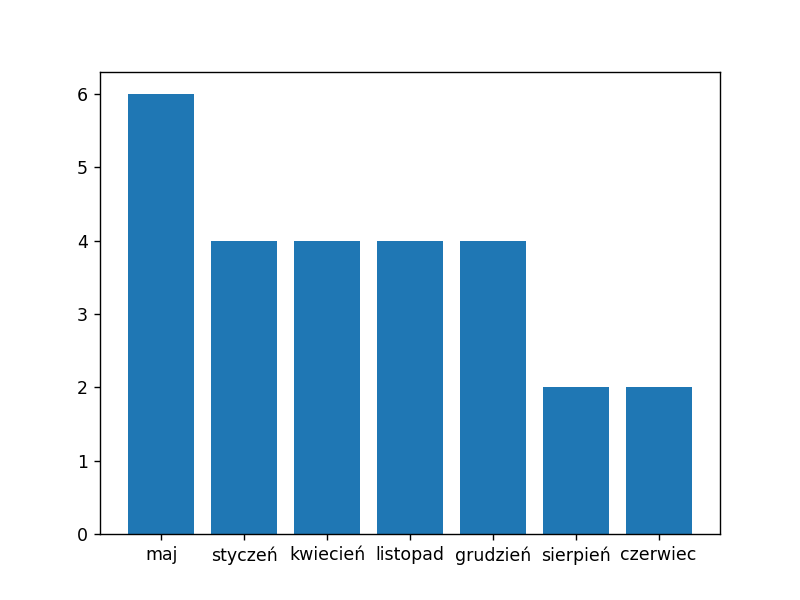

In [95]:
m_month = plt.bar(months,values)

<IPython.core.display.Javascript object>


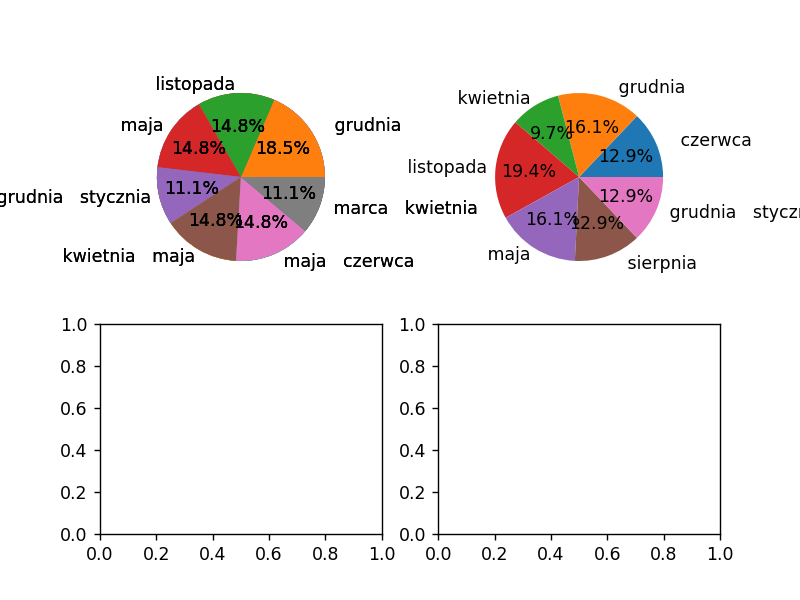

In [96]:
fig = plt.figure()

In [97]:
pie1 = fig.add_subplot(221)
pie2 = fig.add_subplot(222)
pie3 = fig.add_subplot(223)
pie4 = fig.add_subplot(224)

In [98]:
quarter1 = ['Stycznia', 'Lutego', 'Marca']
quarter2 = ['Kwietnia', 'Maja', 'Czerwca', ]
quarter3 = ['Lipca','Sierpnia', 'Września']
quarter4 = ['Października', 'Listopada', 'Grudnia']

In [99]:
data = [i_wknd['month'], i_wknd['how_many_days'], i_wknd['year']]
headers = ['month', 'how_many_days', 'year']
months_values = pd.concat(data, axis=1, keys=headers)

In [100]:
months_values

,month,how_many_days,year
0,grudnia stycznia,3,2018
1,marca kwietnia,3,2018
2,kwietnia maja,4,2018
3,maja,4,2018
4,maja czerwca,4,2018
5,listopada,4,2018
6,grudnia,5,2018
7,grudnia stycznia,4,2019
8,kwietnia,3,2019
9,maja,5,2019


In [107]:
m_grp_2019 = months_values.where(months_values['year'] > 2018)
m_grp_2019 = m_grp_2019.dropna()
m_grp_2019 = m_grp_2019.groupby(by=['month']).sum()
m_grp_2019

,how_many_days,year
month,,
czerwca,4.0,2019.0
grudnia,5.0,2019.0
kwietnia,3.0,2019.0
listopada,6.0,4038.0
maja,5.0,2019.0
sierpnia,4.0,2019.0
grudnia stycznia,4.0,2019.0


In [108]:
m_grp_2018 = months_values.where(months_values['year'] < 2019)
m_grp_2018 = m_grp_2018.dropna()
m_grp_2018 = m_grp_2018.groupby(by=['month']).sum()
m_grp_2018

,how_many_days,year
month,,
grudnia,5.0,2018.0
listopada,4.0,2018.0
maja,4.0,2018.0
grudnia stycznia,3.0,2018.0
kwietnia maja,4.0,2018.0
maja czerwca,4.0,2018.0
marca kwietnia,3.0,2018.0


In [119]:
month_percent_2018 = (m_grp_2018['how_many_days']*100)/30
pie1.pie(month_percent_2018,labels=m_grp_2018.index, autopct='%1.1f%%')
month_percent_2019 = (m_grp_2019['how_many_days']*100)/30
pie2.pie(month_percent_2019,labels=m_grp_2019.index, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x28f5e8523a0>,
 [Text(1.0108535980228326, 0.4337914284126577, '   czerwca'),
  Text(0.2757178272949884, 1.0648848199273624, '   grudnia'),
  Text(-0.5818603521522637, 0.933508720148475, '   kwietnia'),
  Text(-1.0943562456479174, 0.111285253342008, '   listopada'),
  Text(-0.581860526955042, -0.9335086111930628, '   maja'),
  Text(0.3820356223574263, -1.031527403053343, '   sierpnia'),
  Text(1.0108535167938453, -0.43379161769853913, ' grudnia   stycznia')],
 [Text(0.5513746898306359, 0.23661350640690418, '12.9%'),
  Text(0.15039154216090272, 0.5808462654149249, '16.1%'),
  Text(-0.3173783739012347, 0.5091865746264409, '9.7%'),
  Text(-0.5969215885352277, 0.060701047277458904, '19.4%'),
  Text(-0.3173784692482047, -0.509186515196216, '16.1%'),
  Text(0.20838306674041432, -0.5626513107563689, '12.9%'),
  Text(0.5513746455239155, -0.23661360965374859, '12.9%')])

In [102]:
wig = pd.read_html('https://notowania.pb.pl/instrument/PL9999999987/wig20')